In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# From two sets of coordinates finds the coordinates of a third point creating an equilateral triangle
# This is always to the left of the ordered segment pq
def eq_point(p,q):
    #could use scalar version to avoid explaining matrix transformations
    #return np.array([0.5*(p[0] + q[0] + math.sqrt(3)*(p[1]-q[1])), 0.5*((p[1]+q[1])+math.sqrt(3)*(q[0] - p[0]))])
    mat = np.array([[0, -1],[1,0]])
    return 0.5*(p + q + np.sqrt(3)*np.matmul(mat, q-p))

def split_segment(p,q):
    r_0 = 2*p/3 + q/3
    r_2 = p/3 + 2*q/3
    r_1 = eq_point(r_0, r_2)
    return [p, r_0, r_1, r_2, q]

def split_pattern(pt_list):
    new_list =[]
    for p, q in zip(pt_list, pt_list[1:]):
        new_list += split_segment(p,q)
    return new_list

def make_pattern(lvl, p = np.array([0,0]), q = np.array([1,0])):
    list = [p, q]
    for _ in range(lvl):
        list = split_pattern(list)
    return list
        

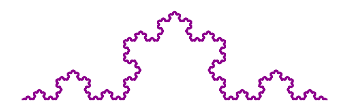

In [14]:
points = make_pattern(6)
xs, ys = zip(*points)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.plot(xs, ys, color ='darkmagenta');

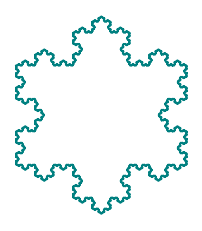

In [15]:
p = np.array([0,0])
q = np.array([1,0])
r = eq_point(q,p)
lvl = 6

points = make_pattern(lvl, p, q)
points += make_pattern(lvl, q, r)
points += make_pattern(lvl, r, p)
xs, ys = zip(*points)

xs, ys = zip(*points)
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.plot(xs, ys, color ='teal');